# Import Packages

In [11]:
#Import necessary packages
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [13]:
#Load the data
column_names = [
    "Country",
    "Current health expenditure per capita (current US$)",
    "GDP per capita (current US$)",
    "Immunization, DPT (% of children ages 12-23 months)",
    "Individuals using the Internet (% of population)",
    "Urban population (% of total population)",
    "Crude death rate (per 1000)",
    "Life expectancy at birth (Both)"
]

full_data = pd.read_csv('data/joined_data.csv', header=None, names=column_names)
full_data

,Country,Current health expenditure per capita (current US$),GDP per capita (current US$),"Immunization, DPT (% of children ages 12-23 months)",Individuals using the Internet (% of population),Urban population (% of total population),Crude death rate (per 1000),Life expectancy at birth (Both)
0,Afghanistan ...,60.058540,565.56973,64,8.2600,24.803,8.6,60
1,Albania ...,255.356354,3952.80357,99,56.9000,57.434,7.2,77
2,Algeria ...,292.275177,4685.05903,95,38.2000,70.848,5.1,74
3,Angola ...,107.643562,3213.90261,59,22.0000,63.446,14.2,52
4,Antigua and Barbuda ...,784.645386,16080.65800,99,70.0000,25.000,6.2,76
...,...,...,...,...,...,...,...,...
175,Venezuela ...,0.000000,0.00000,87,58.0000,88.154,5.5,74
176,Vietnam ...,122.272133,2577.56885,97,45.0000,33.809,5.8,76
177,Yemen ...,63.300209,1362.17379,63,24.0854,34.777,7.1,64
178,Zambia ...,57.920475,1295.87789,90,8.8000,41.907,9.7,59


# Clean the Data

In [14]:
# Drop the 'Country' column
full_data_cleaned = full_data.drop(columns=['Country'])

other_variables = [
    'Current health expenditure per capita (current US$)',
    'GDP per capita (current US$)',
    'Immunization, DPT (% of children ages 12-23 months)',
    'Urban population (% of total population)',
    'Crude death rate (per 1000)',
    'Life expectancy at birth (Both)'
]

# EDA

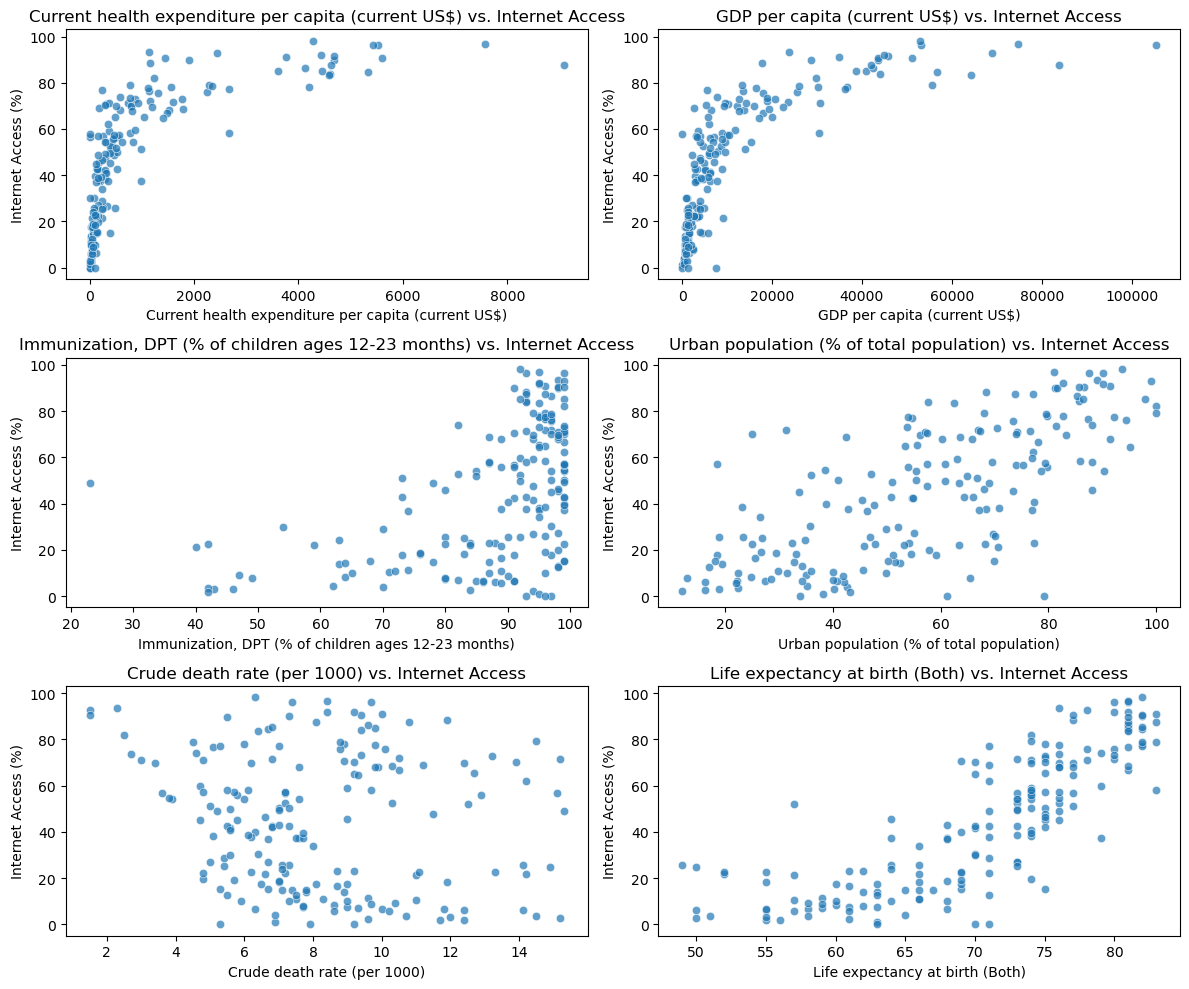

In [16]:
# Create scatter plots with Internet Access on the Y-axis
plt.figure(figsize=(12, 10))


for i, var in enumerate(other_variables, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=full_data_cleaned[var], y=full_data_cleaned['Individuals using the Internet (% of population)'], alpha=0.7)
    plt.xlabel(var)
    plt.ylabel("Internet Access (%)")
    plt.title(f"{var} vs. Internet Access")

plt.tight_layout()
plt.show()

## Transform the Data

### Healthcare Expenditure and GDP per capita

In [17]:
# Apply log-transofrmation
full_data_cleaned['log_GDP'] = np.log1p(full_data_cleaned['GDP per capita (current US$)'])
full_data_cleaned['log_Health_Expenditure'] = np.log1p(full_data_cleaned['Current health expenditure per capita (current US$)'])

### DPT Immunization

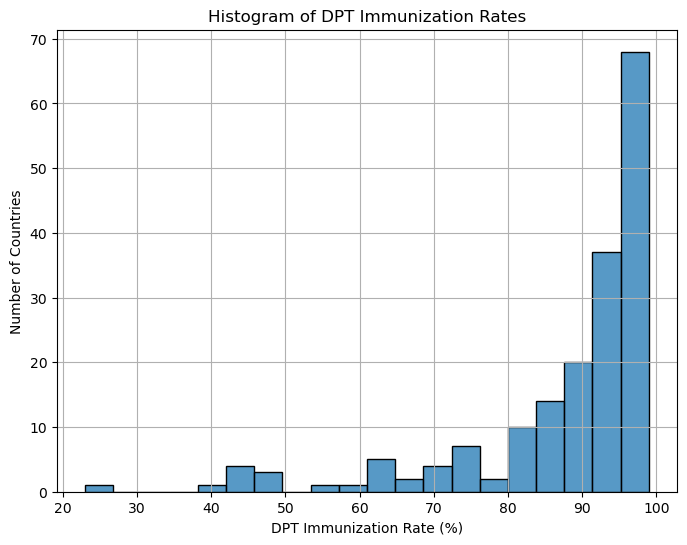

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(full_data_cleaned['Immunization, DPT (% of children ages 12-23 months)'], bins=20)

plt.title('Histogram of DPT Immunization Rates')
plt.xlabel('DPT Immunization Rate (%)')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
full_data_cleaned['scaled_DPT'] = mms.fit_transform(full_data_cleaned[['Immunization, DPT (% of children ages 12-23 months)']])

### Crude Death Rate

In [20]:
full_data_cleaned['CrudeDeath_x_GDP'] = full_data_cleaned['Crude death rate (per 1000)'] * full_data_cleaned['log_GDP']

# Linear Regression

In [21]:
import statsmodels.api as sm

# Choose dependent variable
Y = full_data_cleaned['scaled_DPT']

# Choose independent variable
X = full_data_cleaned[['Individuals using the Internet (% of population)',
                       'log_GDP',
                       'log_Health_Expenditure',
                       'Urban population (% of total population)']]

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             scaled_DPT   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     14.97
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           1.52e-10
Time:                        01:12:40   Log-Likelihood:                 70.850
No. Observations:                 180   AIC:                            -131.7
Df Residuals:                     175   BIC:                            -115.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

### Significant

Adjusted R^2: 0.238 → Model explains approximately 23.8% of the variability in DPT immunization rates

Internet Access: Significant
- Positive coefficient (0.0028): Each 1% increase in internet access is associated with a 0.0028 unit increse in scaled DPT immunization, all else equal.
- p = 0.002: Is statistically significant (p < 0.05). There’s strong evidence that internet access is associated with higher immunization rates.
- Confidence Interval: coef is not 0 in the interval, so is significant
- Possible reason: Better digital connectivity helps health campaigns reach parents better.

Log_Health_Expenditure: Significant
- Positive coefficient (0.0332): Countries that spend more per capita on health also have higher immunization rates.
- p = 0.019: Is statistically significant (p < 0.05).It must accounted for to avoid overstating the role of internet access.

In [22]:
import statsmodels.api as sm

# Choose dependent variable
Y = full_data_cleaned['Life expectancy at birth (Both)']

# Choose independent variable
X = full_data_cleaned[['Individuals using the Internet (% of population)',
                       'log_GDP',
                       'log_Health_Expenditure',
                       'Urban population (% of total population)']]

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())


                                   OLS Regression Results                                  
Dep. Variable:     Life expectancy at birth (Both)   R-squared:                       0.673
Model:                                         OLS   Adj. R-squared:                  0.666
Method:                              Least Squares   F-statistic:                     90.19
Date:                             Wed, 09 Apr 2025   Prob (F-statistic):           1.81e-41
Time:                                     01:12:53   Log-Likelihood:                -538.84
No. Observations:                              180   AIC:                             1088.
Df Residuals:                                  175   BIC:                             1104.
Df Model:                                        4                                         
Covariance Type:                         nonrobust                                         
                                                       coef    std err          

### Significant

Adjusted R^2: 0.666 → Model explains approximately 66.6% of the variation in life expectancy

Internet Access: Significant
- Positive coefficient: Each 1% increase in internet access is associated with nearly 0.20 more years of life expectancy, holding all else constant.
- p = 0.001: Is statistically significant (p < 0.05). There’s strong evidence that internet access is strongly associated with higher life expectancy
- Confidence Interval: coef is not 0 in the interval, so is significant
- Why it matters: Could reflect better access to health knowledge, services (like telemedicine), or economic/educational effects of digital inclusion.

All Confounding Variables: Not Significant
- After controlling for internet access, the others factors don't explain additional variance in life expectancy. Internet access might be a more powerful indicator than the other variables

In [23]:
import statsmodels.api as sm

# Choose your dependent variable, e.g. Life Expectancy
Y = full_data_cleaned['CrudeDeath_x_GDP']

# Choose independent variables
X = full_data_cleaned[['Individuals using the Internet (% of population)',
                       'log_GDP',
                       'log_Health_Expenditure',
                       'Urban population (% of total population)']]

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       CrudeDeath_x_GDP   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     9.667
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           4.37e-07
Time:                        01:12:57   Log-Likelihood:                -831.28
No. Observations:                 180   AIC:                             1673.
Df Residuals:                     175   BIC:                             1689.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

### Not Significant

Internet Access: Not Significant
- p = 0.721: Is not statistically significant (p > 0.05). No statistical relationship between internet access and the crude death rate
- Confidence Interval: 0 in the coef interval, so is not significant
- Possible reason: Crude death rate is affected by many non-digital factors (war, disease outbreaks)



### If a Confounding Variable is Significant:

That means the variable has an independent effect on the health outcome, separate from Internet Access. It’s important to control for it to avoid biased estimates.

# Results Visualisation

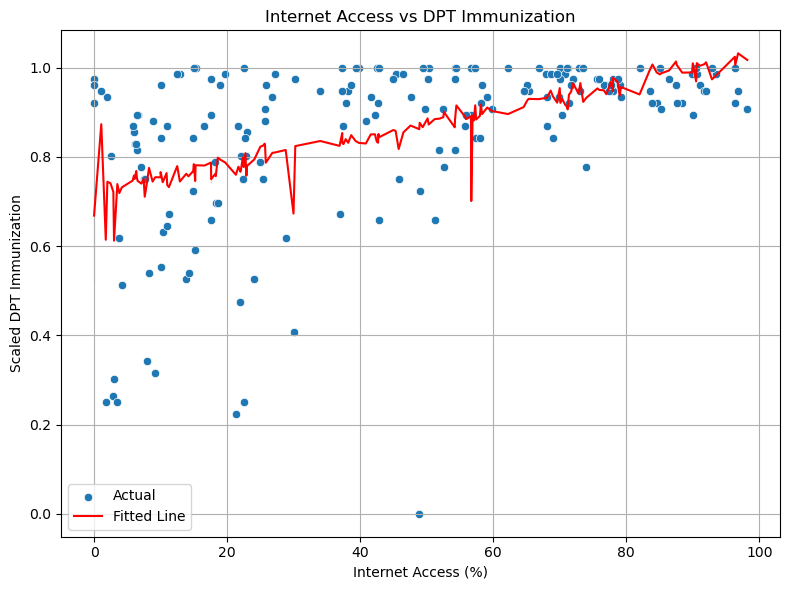

In [24]:
predictors = [
    'Individuals using the Internet (% of population)',
    'log_GDP',
    'log_Health_Expenditure',
    'Urban population (% of total population)'
]

# Prepare data
X = full_data_cleaned[predictors]
X = sm.add_constant(X)
y = full_data_cleaned['scaled_DPT']

# Fit model
model = sm.OLS(y, X).fit()
full_data_cleaned['predicted_DPT'] = model.predict(X)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=full_data_cleaned['Individuals using the Internet (% of population)'], 
                y=full_data_cleaned['scaled_DPT'], label="Actual")
sns.lineplot(x=full_data_cleaned['Individuals using the Internet (% of population)'], 
             y=full_data_cleaned['predicted_DPT'], color='red', label="Fitted Line")
plt.xlabel('Internet Access (%)')
plt.ylabel('Scaled DPT Immunization')
plt.title('Internet Access vs DPT Immunization')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

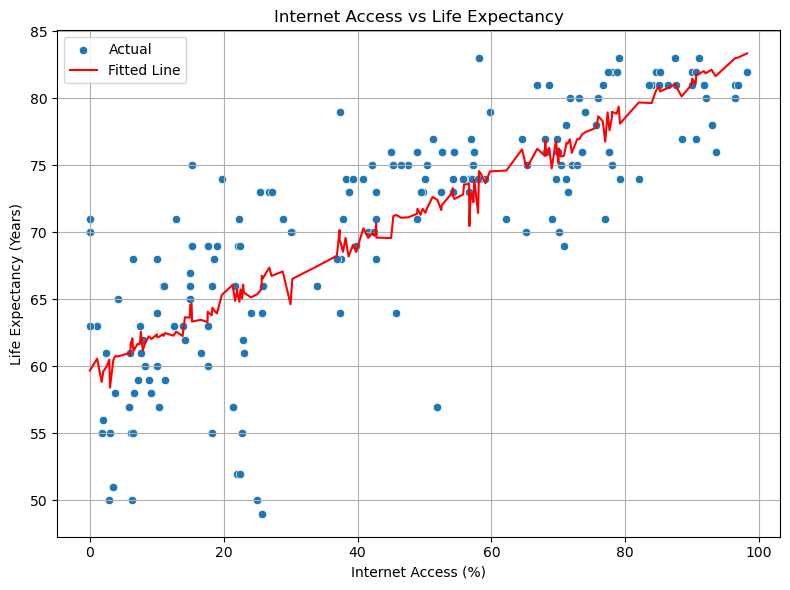

In [25]:
# Prepare data
y = full_data_cleaned['Life expectancy at birth (Both)']
model = sm.OLS(y, X).fit()
full_data_cleaned['predicted_life'] = model.predict(X)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=full_data_cleaned['Individuals using the Internet (% of population)'], 
                y=full_data_cleaned['Life expectancy at birth (Both)'], label="Actual")
sns.lineplot(x=full_data_cleaned['Individuals using the Internet (% of population)'], 
             y=full_data_cleaned['predicted_life'], color='red', label="Fitted Line")
plt.xlabel('Internet Access (%)')
plt.ylabel('Life Expectancy (Years)')
plt.title('Internet Access vs Life Expectancy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


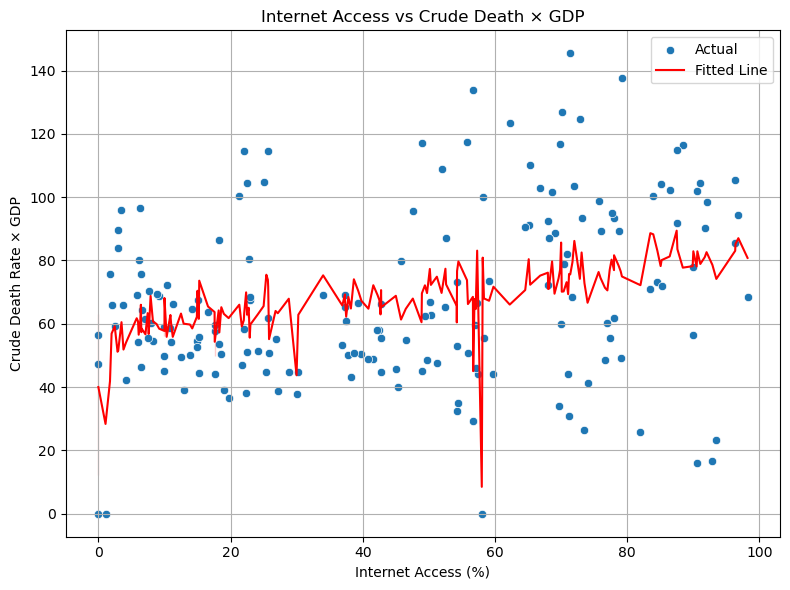

In [26]:
# Prepare data
y = full_data_cleaned['CrudeDeath_x_GDP']
model = sm.OLS(y, X).fit()
full_data_cleaned['predicted_crude'] = model.predict(X)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=full_data_cleaned['Individuals using the Internet (% of population)'], 
                y=full_data_cleaned['CrudeDeath_x_GDP'], label="Actual")
sns.lineplot(x=full_data_cleaned['Individuals using the Internet (% of population)'], 
             y=full_data_cleaned['predicted_crude'], color='red', label="Fitted Line")
plt.xlabel('Internet Access (%)')
plt.ylabel('Crude Death Rate × GDP')
plt.title('Internet Access vs Crude Death × GDP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
